# Sleep EEG spectral analyses

## Intoductory notes:
This notebook presents spectral analyses functionality:
* Spectrogram
* PSD per sleep stage
* Topomaps for regular and parametrized spectra per sleep stage
* Additional results such as hypnogram and sleep statistics.

Recommended readings and watchings:
1. [Mike X Cohen: Static spectral analysis](https://youtube.com/playlist?list=PLn0OLiymPak2jxGCbWrcgmXUtt9Lbjj_A)
2. [FOOOF: Topographical analyses with MNE](https://fooof-tools.github.io/fooof/auto_examples/analyses/plot_mne_example.html#topographical-analyses-with-mne)

## Import data

### Import module
Add pipeline module to path and import its elements (just run this cell).

In [1]:
from sleepeeg.pipeline import SpectralPipe

### Initialize SpectralPipe object

In [2]:
spectral_pipe = SpectralPipe(
    # can be any type of eeg file that MNE's read_raw() function supports.
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\HZ4\processing\ICAPipe\after_ica_raw.fif",  
    output_dir=r"C:\Users\Gennadiy\Documents\data\HZ4\processing",  # A directory you want the results to be saved in
    path_to_hypno=r"C:\Users\Gennadiy\Documents\data\HZ4\staging.txt",  # Point-per-row type of hypnogram
    hypno_freq=1  # Hypnogram's sampling frequency (visbrain's hypnograms default to 1)
    )

Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\ICAPipe\after_ica_raw.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 0 ... 2032249 =      0.000 ...  8128.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\ICAPipe\after_ica_raw-1.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 2032250 ... 2229772 =   8129.000 ...  8919.088 secs
Ready.


c:\Users\Gennadiy\Documents\eeg-processing-pipeline\.venv\Lib\site-packages\antropy\fractal.py:197: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit((types.Array(types.float64, 1, "C", readonly=True), types.int32))
05-Jun-23 13:22:08 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


## Hypnospectrogram

Setting 166506 of 2229773 (7.47%) samples to NaN, retaining 2063267 (92.53%) samples.


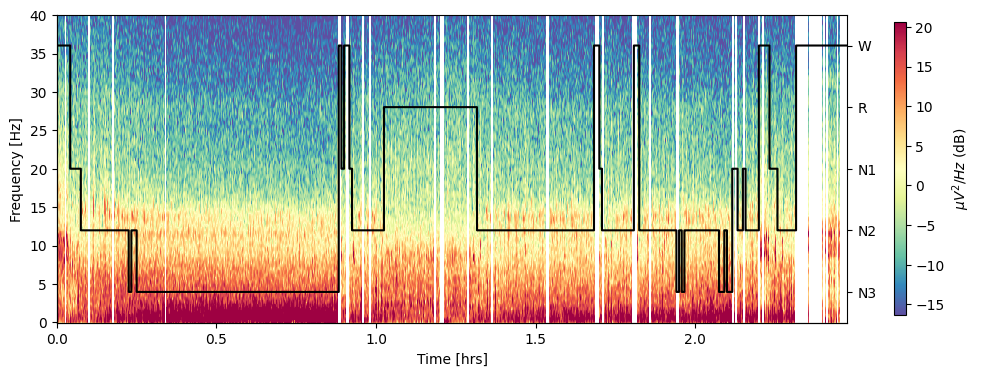

In [3]:
spectral_pipe.plot_hypnospectrogram(
    picks=['E101'],  # Channel[s] to compute spectrogram on.
    win_sec=10,  # The length of the sliding window, in seconds, used for multitaper PSD calculation.
    freq_range=(0, 40),  # Y axis limits
    cmap='Spectral_r',  # Matplotlib colormap as in https://matplotlib.org/stable/tutorials/colors/colormaps.html
    overlap=True,  # Whether to plot hypnogram over spectrogram (True) or on top of it (False)
    save=True  # Whether to save the plot as a file.
    )

## Power Spectral Density

In [4]:
spectral_pipe.compute_psds_per_stage(
    # A dict describing stages and their indices in the hypnogram file. 
    sleep_stages = {"Wake": 0, "N1": 1, "N2/3": (2,3), "REM": 4},
    reference = 'average',  # Rereferencing to apply. Can be list of str channels or "average".
    method="welch",  # welch or multitaper
    fmin=0,  # Minimal frequency to compute
    fmax=60,  # Maximal frequency to compute
    picks="eeg",  # Channels to compute the PSD for.
    reject_by_annotation=True,  # Whether to reject epochs annotated as BAD.
    save=True,  # Whether to save the PSD hdf5 file for each sleep stage.
    overwrite=False,
    n_jobs=-1,  # n_jobs, refer to the MNE documentation.
    verbose=False,  # verbose, refer to the MNE documentation.
    # Additional arguments passed to the PSD computing method, i.e., welch or multitaper:
    n_fft=1024,
    n_per_seg=1024,
    n_overlap=512,
    window="hann"
    )

Reading 0 ... 2229772  =      0.000 ...  8919.088 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Removing existing average EEG reference projection.
Setting 166506 of 2229773 (7.47%) samples to NaN, retaining 2063267 (92.53%) samples.
Setting 166506 of 2229773 (7.47%) samples to NaN, retaining 2063267 (92.53%) samples.
Setting 166506 of 2229773 (7.47%) samples to NaN, retaining 2063267 (92.53%) samples.
Setting 166506 of 2229773 (7.47%) samples to NaN, retaining 2063267 (92.53%) samples.


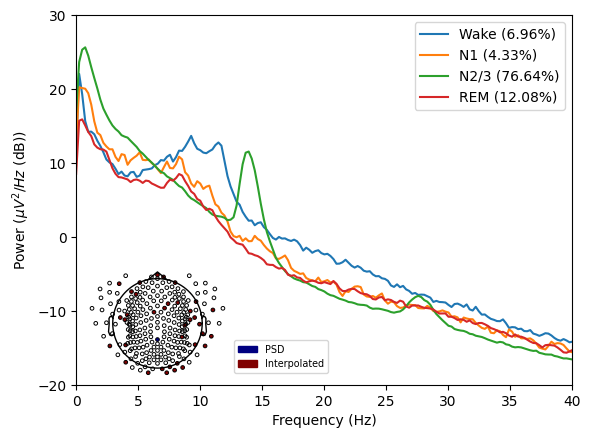

In [5]:
spectral_pipe.plot_psds(
    picks=['E101'],
    psd_range=(-20, 30),  # Y axis limits
    freq_range=(0, 40),  # X axis limits
    dB=True,
    xscale='linear',  # Matplotlib xscale. Can be {"linear", "log", "symlog", "logit", ...} or ScaleBase
    axis=None,
    plot_sensors=True,  # Whether to plot EEG sensors showing which channels were used to compute PSD.
    save=True,  # Whether to save the plot as a png file.
    )

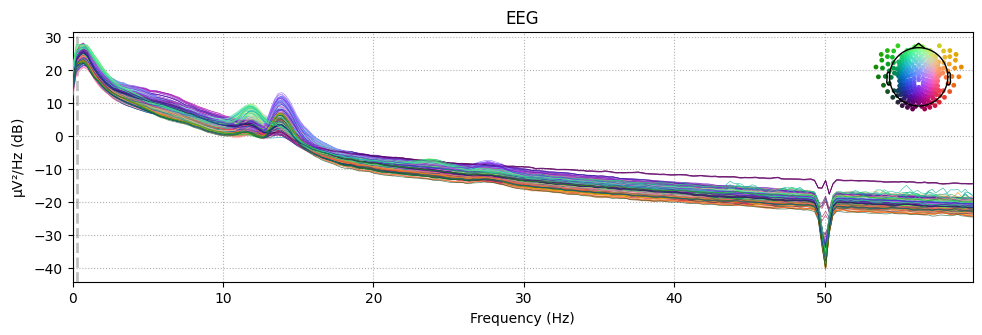

In [6]:
spectral_pipe.psds['N2/3'].plot(picks='data', exclude='bads', show=False)

In [7]:
spectral_pipe.psds['REM'].to_data_frame()

freq            E1            E2            E3            E4   
0     0.000000  5.597468e-11  6.540467e-11  2.579734e-11  2.530217e-11  \
1     0.244141  2.356775e-10  2.776372e-10  1.133808e-10  1.114890e-10   
2     0.488281  1.415746e-10  1.637890e-10  7.969581e-11  7.891973e-11   
3     0.732422  6.711367e-11  7.499127e-11  4.840010e-11  4.819158e-11   
4     0.976562  3.403748e-11  4.685905e-11  3.888503e-11  3.882267e-11   
..         ...           ...           ...           ...           ...   
241  58.837891  1.180724e-14  1.604047e-14  1.070268e-14  1.163463e-14   
242  59.082031  1.109946e-14  1.564750e-14  9.957830e-15  1.033681e-14   
243  59.326172  1.133633e-14  1.535886e-14  8.956131e-15  9.176655e-15   
244  59.570312  1.072757e-14  1.586153e-14  8.983163e-15  9.128599e-15   
245  59.814453  1.080923e-14  1.522187e-14  9.733057e-15  9.966689e-15   

               E5            E6            E7            E8            E9   
0    1.259159e-11  1.078909e-11  1.102341e-11  8.643577e-12  8.034879e-12  \
1    6.170329e-11  6.481439e-11  6.237810e-11  5.255476e-11  5.153826e-11   
2    5.571286e-11  5.536091e-11  5.544326e-11  5.184729e-11  4.729497e-11   
3    3.999074e-11  3.958908e-11  4.004213e-11  3.915890e-11  3.469885e-11   
4    3.318283e-11  3.455000e-11  3.473336e-11  3.435806e-11  3.222240e-11   
..            ...           ...           ...           ...           ...   
241  1.002933e-14  1.169975e-14  1.248178e-14  1.261510e-14  1.115553e-14   
242  9.548974e-15  1.081981e-14  1.170214e-14  1.179231e-14  1.095463e-14   
243  8.999585e-15  1.003221e-14  1.096758e-14  1.174201e-14  1.058434e-14   
244  8.696999e-15  1.025508e-14  1.105650e-14  1.223494e-14  1.012873e-14   
245  8.839262e-15  1.044888e-14  1.111770e-14  1.202365e-14  1.069963e-14   

     ...          E248          E249          E250          E251   
0    ...  3.926272e-11  3.204848e-11  2.049190e-11  1.208646e-11  \
1    ...  1.665051e-10  1.299085e-10  9.184827e-11  5.697371e-11   
2    ...  1.087208e-10  8.350680e-11  6.069538e-11  4.248592e-11   
3    ...  5.351023e-11  4.158581e-11  3.280672e-11  2.444901e-11   
4    ...  3.402652e-11  2.568071e-11  2.253701e-11  1.738125e-11   
..   ...           ...           ...           ...           ...   
241  ...  8.843545e-15  9.307345e-15  9.347350e-15  5.394636e-15   
242  ...  8.430800e-15  9.300614e-15  9.317456e-15  5.239156e-15   
243  ...  8.076271e-15  8.993490e-15  9.030892e-15  5.443301e-15   
244  ...  7.400713e-15  8.029083e-15  7.707268e-15  5.164289e-15   
245  ...  7.928349e-15  7.988145e-15  7.739882e-15  5.239433e-15   

             E252          E253          E254          E255          E256   
0    8.717596e-11  3.705162e-11  3.143500e-11  1.195619e-11  9.094943e-12  \
1    3.370859e-10  1.550628e-10  1.135587e-10  5.622129e-11  4.421548e-11   
2    1.873686e-10  8.681667e-11  6.487512e-11  4.153978e-11  3.510962e-11   
3    7.670461e-11  4.076351e-11  3.283719e-11  2.396648e-11  2.189157e-11   
4    3.727504e-11  2.468925e-11  2.248623e-11  1.717685e-11  1.650374e-11   
..            ...           ...           ...           ...           ...   
241  1.282782e-14  1.076163e-14  6.452269e-15  5.448864e-15  4.788069e-15   
242  1.357373e-14  9.816294e-15  6.290366e-15  5.076308e-15  4.764473e-15   
243  1.282140e-14  9.181973e-15  6.645607e-15  5.295879e-15  4.958184e-15   
244  1.107026e-14  8.605761e-15  6.344613e-15  5.042892e-15  4.770917e-15   
245  1.202576e-14  9.642702e-15  5.600641e-15  5.150851e-15  4.917468e-15   

             VREF  
0    7.949312e-12  
1    4.885688e-11  
2    4.492288e-11  
3    3.334317e-11  
4    3.114671e-11  
..            ...  
241  1.089925e-14  
242  1.074022e-14  
243  1.048359e-14  
244  9.916804e-15  
245  1.052000e-14  

[246 rows x 258 columns]

## Topomap

Plots a topomap for one stage and one frequency band

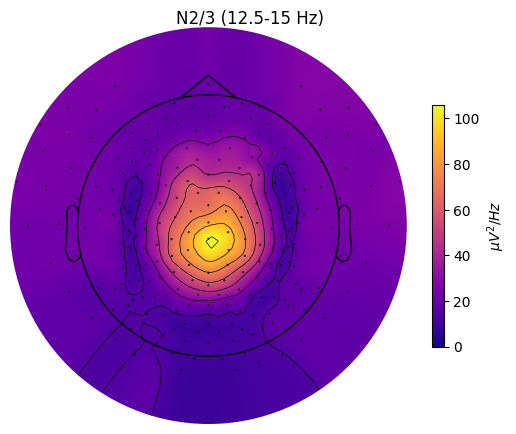

In [12]:
spectral_pipe.plot_topomap(
    stage='N2/3',  # Stage to plot topomap for.
    band={'SMR': (12.5, 15)},  # Band to plot topomap for.
    # Should contain at least index of the provided "stage".
    dB=False,  # Whether to transform PSD to dB/Hz
    fooof=False,  # Whether to plot parametrised spectra.
    axis=None,  # Whether to plot on provided matplotlib axis.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap='plasma'),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
    fooof_group_args=None,  # Arguments passed to the fooof.FOOOFGroup().
    fooof_get_band_peak_fg_args=None,  # Arguments passed to the fooof.analysis.get_band_peak_fg().
    subplots_args=None,  # Arguments passed to the plt.subplots(). Have no effect if axis is provided.
)

## Topomap collage
Plot a topomap for multiple bands and sleep_stages

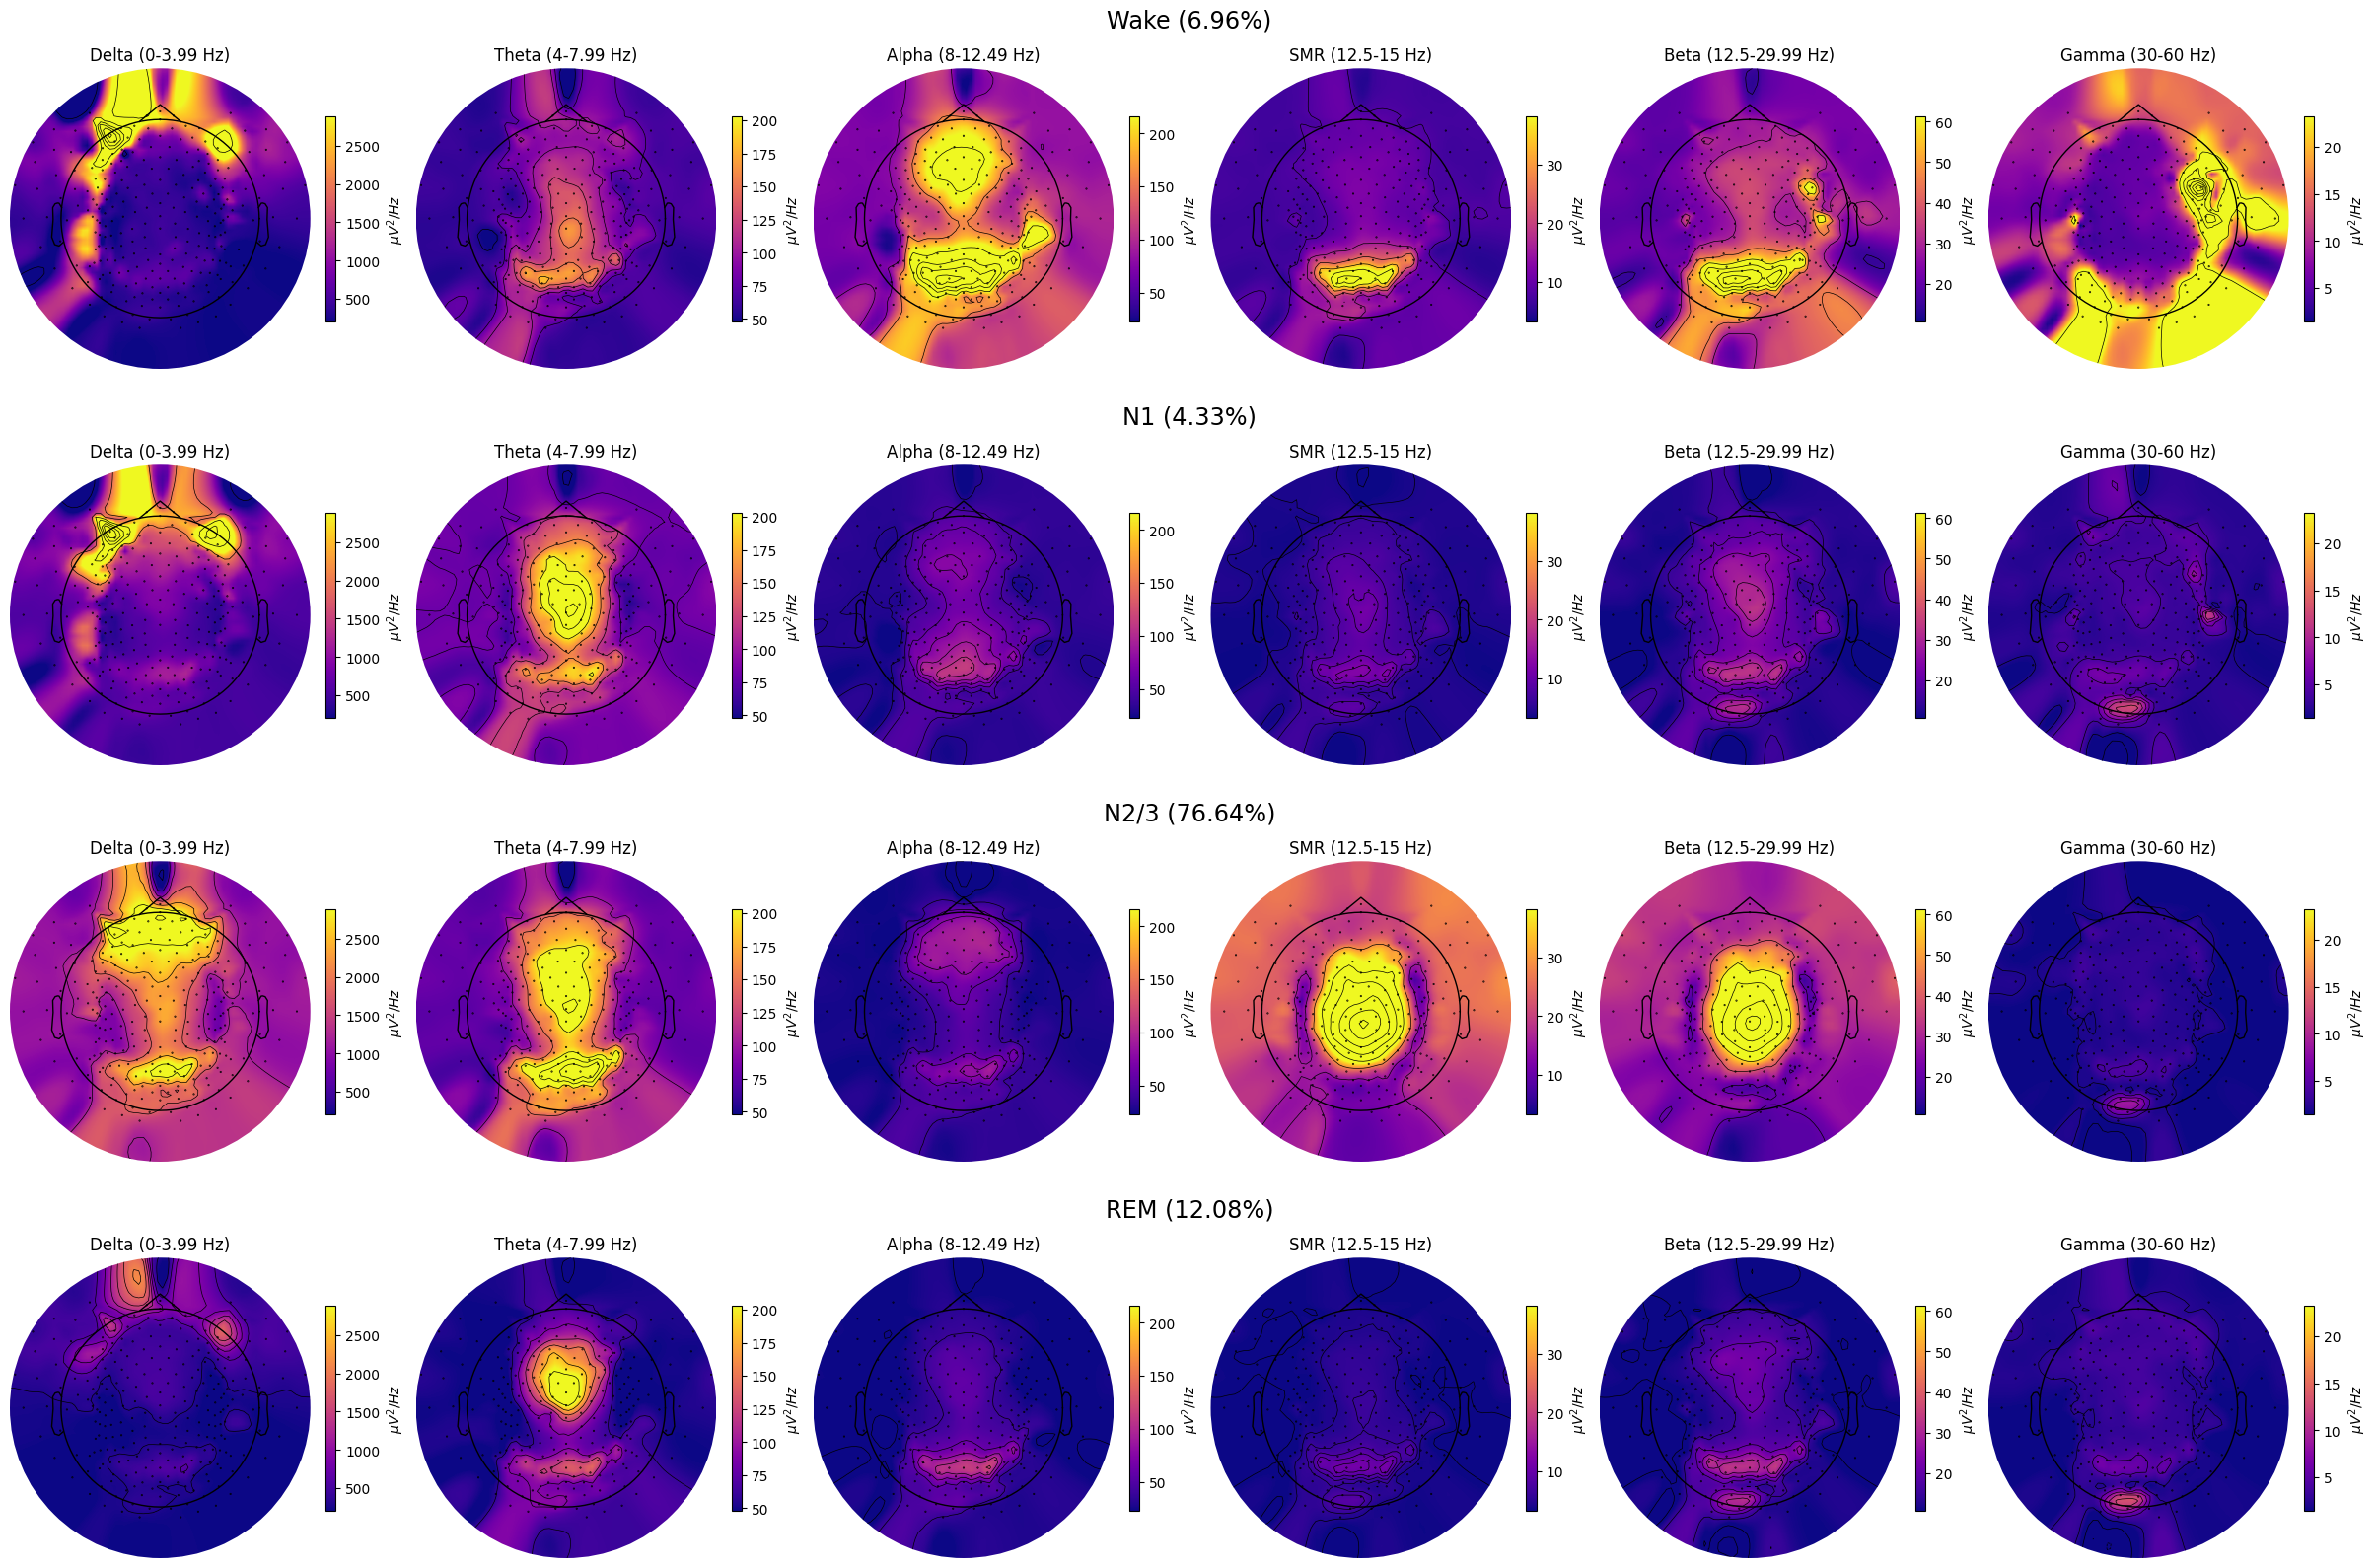

In [13]:
%matplotlib inline
spectral_pipe.plot_topomap_collage(
    #  Bands to plot topomaps for.
    bands = {'Delta': (0, 3.99), 'Theta': (4, 7.99),
            'Alpha': (8, 12.49), 'SMR': (12.5, 15), 
            'Beta': (12.5, 29.99), 'Gamma': (30, 60)},
    # Tuple of strs or "all", e.g., ("N1", "REM") or "all" (plots all "sleep_stages").
    stages_to_plot="all", 
    dB=False,  # Whether to transform PSD to dB/Hz.
    fooof=False,  # Whether to plot parametrised spectra.
    low_percentile=5,  # Set min color value by percentile of the band data.
    high_percentile=95,  # Set max color value by percentile of the band data.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap='plasma'),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
    fooof_group_args=None,  # Arguments passed to the fooof.FOOOFGroup().
    fooof_get_band_peak_fg_args=None,  # Arguments passed to the fooof.analysis.get_band_peak_fg().
    figure_args=None,  # Arguments passed to the plt.figure().
)

## FOOOF topomap collage

c:\Users\Gennadiy\Documents\eeg-processing-pipeline\.venv\Lib\site-packages\fooof\objs\group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)
c:\Users\Gennadiy\Documents\eeg-processing-pipeline\.venv\Lib\site-packages\fooof\objs\group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)
c:\Users\Gennadiy\Documents\eeg-processing-pipeline\.venv\Lib\site-packages\fooof\objs\group.py:378: VisibleDeprecationWarning: Crea

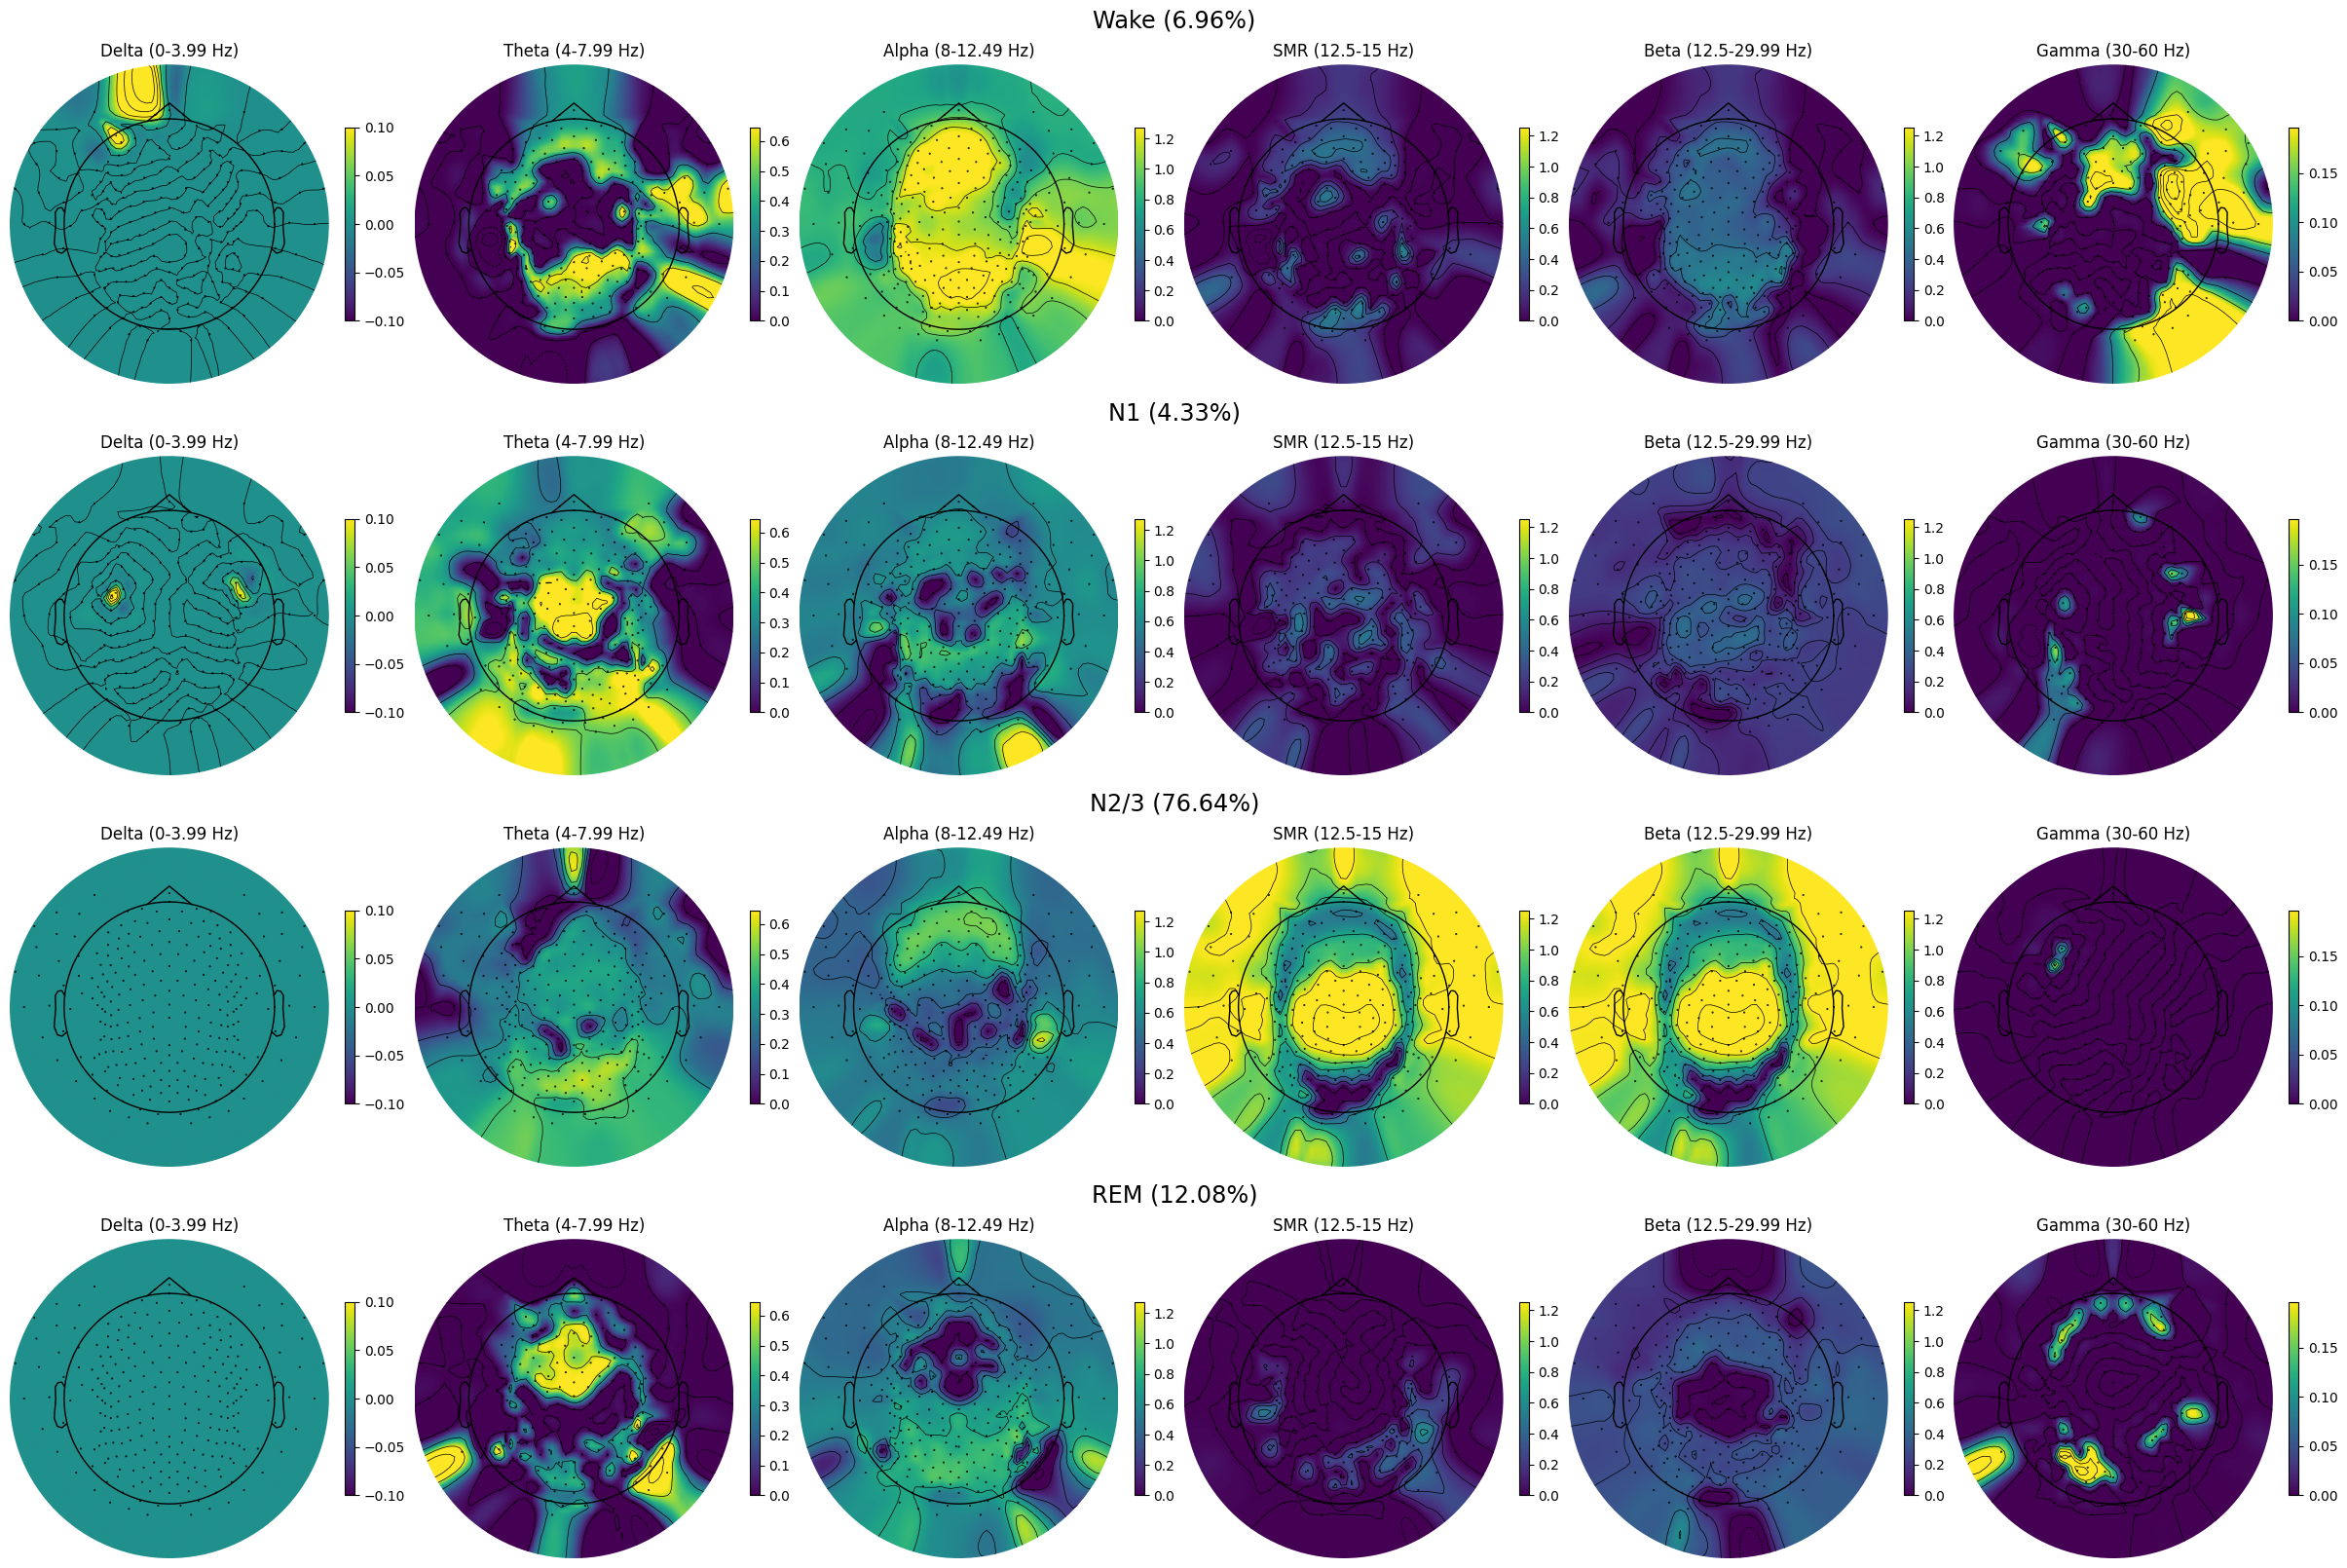

In [10]:
spectral_pipe.plot_topomap_collage(
    #  Bands to plot topomaps for.
    bands = {'Delta': (0, 3.99), 'Theta': (4, 7.99),
            'Alpha': (8, 12.49), 'SMR': (12.5, 15), 
            'Beta': (12.5, 29.99), 'Gamma': (30, 60)},
    # Tuple of strs or "all", e.g., ("N1", "REM") or "all" (plots all "sleep_stages").
    stages_to_plot="all", 
    dB=False,  # Whether to transform PSD to dB/Hz.
    fooof=True,  # Whether to plot parametrised spectra.
    low_percentile=5,  # Set min color value by percentile of the band data.
    high_percentile=95,  # Set max color value by percentile of the band data.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap='viridis'),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
    # Arguments passed to the fooof.FOOOFGroup().
    fooof_group_args=dict( 
        peak_width_limits=[1,6],
        min_peak_height=0.15,
        peak_threshold=2.0,
        aperiodic_mode='fixed',
        verbose=False
    ),  
    # Arguments passed to the fooof.analysis.get_band_peak_fg().
    fooof_get_band_peak_fg_args=dict(
        threshold=None,
        thresh_param='PW',
        attribute='peak_params'
    ),  
    figure_args=None,  # Arguments passed to the plt.figure().
)

## Sleep Stats

In [11]:
spectral_pipe.sleep_stats(save=True)